In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print dataset shape
print(f"Train images: {train_images.shape}")
print(f"Test images: {test_images.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


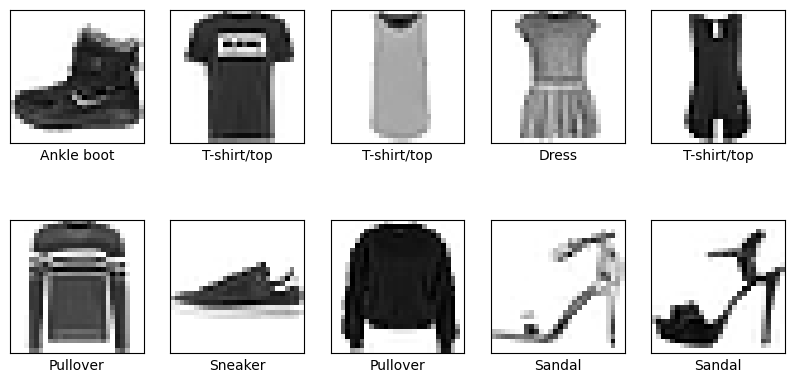

In [3]:
# Display first 10 images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.grid(False)  # Remove grid lines
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Show image in grayscale
    plt.xlabel(class_names[train_labels[i]])  # Label the image
plt.show()

In [4]:


# plt.figure(figsize=(12, 8))
# for i in range(10):
#     plt.subplot(2, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i].reshape(28, 28), cmap='inferno')  # Using a different colormap
#     plt.xlabel(class_names[train_labels[i]], fontsize=12)
# plt.show()




In [5]:
# Normalize images (Scale pixel values between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input (Adding depth channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for classification
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.7708 - loss: 0.6336 - val_accuracy: 0.8673 - val_loss: 0.3613
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8822 - loss: 0.3210 - val_accuracy: 0.8748 - val_loss: 0.3262
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9019 - loss: 0.2654 - val_accuracy: 0.8913 - val_loss: 0.2941
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9143 - loss: 0.2306 - val_accuracy: 0.8992 - val_loss: 0.2723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9268 - loss: 0.1982 - val_accuracy: 0.9019 - val_loss: 0.2722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9323 - loss: 0.1787 - val_accuracy: 0.9078 - val_loss: 0.2600
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9409 - loss: 0.1573 - val_accuracy: 0.9033 - val_loss: 0.2910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9492 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9051 - loss: 0.3160
Test Accuracy: 90.59%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


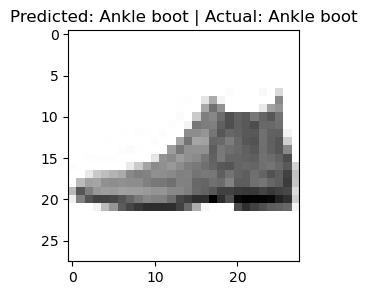

In [9]:
predictions = model.predict(test_images)

# Show sample prediction
plt.figure(figsize=(6,3))
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]} | Actual: {class_names[test_labels[0]]}")
plt.show()


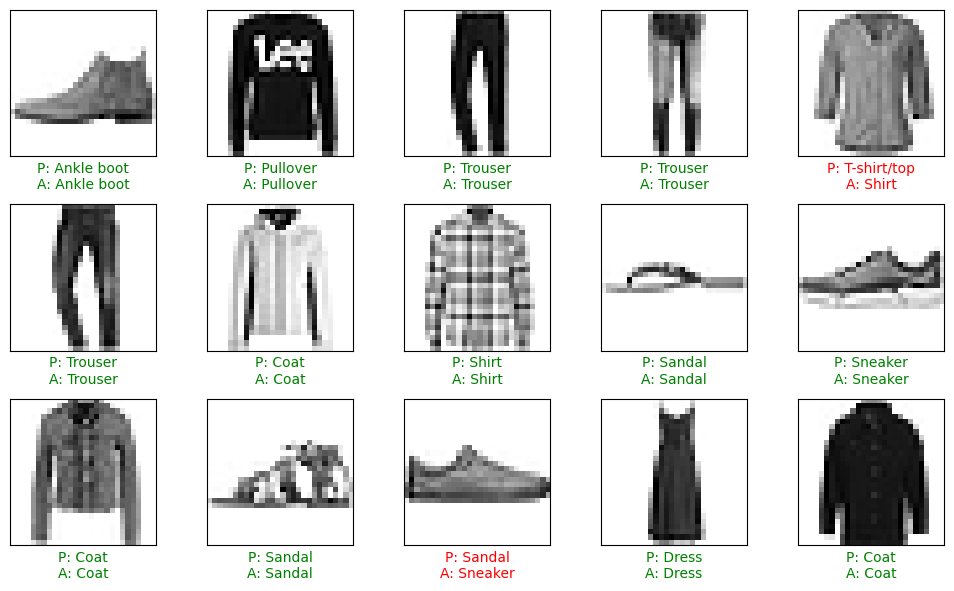

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define number of images to display
num_images = 15

# Set up the plot grid (3 rows, 5 columns)
plt.figure(figsize=(10, 6))

for i in range(num_images):
    plt.subplot(3, 5, i + 1)  # Create subplots
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines

    # Show the image
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Get the predicted class
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i]

    # Set title color: Green if correct, Red if incorrect
    color = 'green' if predicted_label == actual_label else 'red'

    # Display predicted and actual labels
    plt.xlabel(f"P: {class_names[predicted_label]}\nA: {class_names[actual_label]}", color=color)

# Show all images
plt.tight_layout()
plt.show()
